# Admisión de alumnos en la universidad utilizando regresión lineal

---



Partiendo de la lista de alumnos que tienen la oportunidad de entrar en la universidad como conjunto de datos, utilizaremos un algoritmo de machine learning de **regresión lineal** con el objetivo de generar un modelo para predecir la probabilidad de ingreso en la universidad. 

Al ser un problema de **regresión**, utilizaremos un algoritmo **supervisado** de **regresión lineal simple** y un algoritmo de **regresión lineal múltiple** para generar nuestros modelos y medir cuál de ellos tiene menor tasa de error y mejor precisión.

### Importar las librerías necesarias y lectura del conjunto de datos

*   En primer lugar, se importan las librerias necesarias de Python para el tratamiento de los datos, generación de gráficas y generación del modelo.

In [0]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
%matplotlib inline

* En segundo lugar, se realiza la lectura del fichero en el que se encuentra el conjunto de datos, la información del fichero .csv ahora se copia a una variable o instancia DataFrame de Pandas utilizando el método ***read_csv()***.

In [0]:
dataset = pd.read_csv('admission.csv')

* Después podemos visualizar nuestro DataFrame de Pandas que hemos obtenido del fichero .csv.

In [3]:
dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


### Visualización de tipos de datos del conjunto de datos

Es recomendable visualizar el tipo de dato que tienen las variables del conjunto de datos antes de realizar cualquier tratamiento de los mismos.

In [4]:
dataset.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

### Validación de datos no disponibles en el conjunto de datos

Una vez tenemos los datos en el DataFrame de Pandas debemos validar si hay datos no disponibles.

In [5]:
dataset.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### Correlaciones entre las variables del conjunto de datos

Una buena práctica para realizar una buena selección de variables en el modelo que se desea generar, es observar las correlaciones existentes entre todas las variables. Utilizando el método ***corr()*** de nuestro DataFrame obtenemos una tabla con todas las combinaciones entre las variables, las correlaciones se representan en una escala de rango (-1, 1), cuánto más cerca del 1 o -1 mayor correlación entre dos variables, por contrario cuánto mas cerca del 0, menor correlación entre dos variables. 

In [6]:
correlacion = dataset.corr()
display(correlacion)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


También se pueden representar las correlaciones en forma de tabla de mapa de calor, asociando los colores al nivel de correlación.

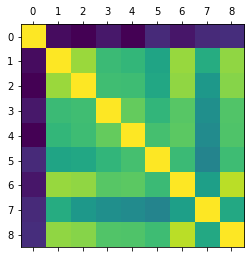

In [7]:
plt.matshow(correlacion)

## 1. Modelo de regresión lineal simple

En este apartado vamos a crear un modelo de **regresión lineal simple**, por lo tanto nuestro modelo será una recta en un plano. Por lo tanto necesitamos obtener dos variables (x, y) seleccionando dos variables del conjunto de datos.

La variable *x* del modelo será la variable 'CGPA' ya que es la que tiene la correlación mas alta con la variable 'Chance of Admit'.

La variable *y* del modelo será la variable que queremos que nuestro modelo realice la predicción, en este caso 'Chance of Admit'.

Ahora ya conocemos las variables (x, y) que utilizaremos para generar el modelo de regresión lineal simple.

### Representación gráfica de dos variables

Es recomendable generar una gráfica 2D en la cuál vamos a ver la relación entre las variables (x, y), o lo que es lo mismo, entre las dos variables seleccionadas del dataset.

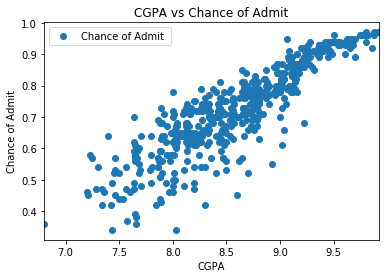

In [8]:
dataset.plot(x='CGPA', y='Chance of Admit ', style='o')  
plt.title('CGPA vs Chance of Admit')  
plt.xlabel('CGPA')  
plt.ylabel('Chance of Admit')  
plt.show()

### Distribución normal de las variables

Para que sea efectivo aplicar un algoritmo y generar un modelo de regresión lineal es necesario que los datos de las variables a predecir tengan una distribución normal.

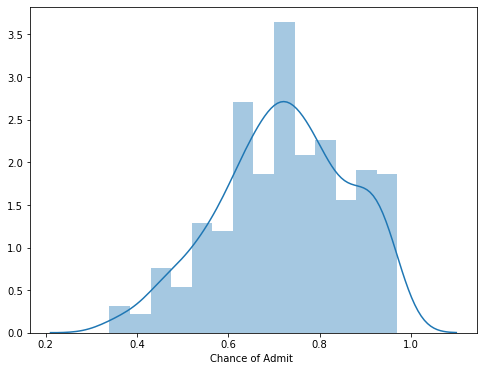

In [9]:
plt.figure(figsize=(8,6))
plt.tight_layout()
seabornInstance.distplot(dataset['Chance of Admit '])

### Selección de variables para el modelo

El siguiente paso es almacenar las variables (x, y) para poder generar un modelo de regresión lineal. Como en este apartado se trata de regresión lineal simple, nuestra x solo tendrá una variable.

La variable *x* será en este caso 'CGPA' y la variable *y* será 'Chance of Admit' 

In [10]:
x = dataset['CGPA'].values.reshape(-1,1)
y = dataset['Chance of Admit '].values.reshape(-1,1)
print("Número de observaciones del dataset:", y.shape[0])

Número de observaciones del dataset: 500


### Entrenamiento y prueba del modelo

Antes de generar el modelo debemos dividir las observaciones del conjunto de datos en dos, una parte para entrenar el algoritmo (train) y otra para probarlo (test).

Utilizaremos el método ***train_test_split()*** de la librería ***sklearn*** para dividir el DataFrame

Indicamos por parámetro *test_size* que el porcentaje de datos para prueba del modelo será el 20% del DataFrame, siendo el 80% el porcentaje de datos para entrenamiento del modelo.

El parámetro *random_state* a un valor en concreto seleccionará siempre el mismo conjunto de test.

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)
print("Número de observaciones para entrenamiento:", y_train.shape[0])
print("Número de observaciones para prueba       :", y_test.shape[0])

Número de observaciones para entrenamiento: 400
Número de observaciones para prueba       : 100


### Generación del modelo

Inicializamos el modelo llamando a una instancia de ***LinearRegression()*** de la librería ***sklearn***.

Llamando al método **fit()** en la instancia del modelo y pasando por parámetro al método la parte del DataFrame de entrenamiento (80%), el algoritmo entrena y genera nuestro modelo.

Una vez generado el modelo de regresión lineal simple podemos visualizar el punto de corte de la recta con el eje x=0 utilizando el atributo ***intercept_*** y la pendiente de la recta utilizando el atributo ***coef_***

In [12]:
modeloRLS = LinearRegression()  
modeloRLS.fit(x_train, y_train)
print(modeloRLS.intercept_)
print(modeloRLS.coef_)

[-1.04642489]
[[0.20633778]]


### Predicción de datos del modelo

Generamos la predición a partir de nuestro modelo ya entrenado, para ello llamamos al método ***predict()*** en la instancia del modelo y pasando por parámetro al método la parte del DataFrame de prueba (20%). 

Almacenamos en la variable *y_pred* los valores de predicción del modelo.

In [13]:
y_pred = modeloRLS.predict(x_test)
print("Número de predicciones:", y_pred.shape[0])

Número de predicciones: 100


Para visualizar las diferencias entre el valor real de *y_test* con *y_pred* podemos generar un DataFrame y observamos las diferencias en una de tabla al realizar el display.

In [14]:
dataset_real_pred = pd.DataFrame({'Real': y_test.flatten(), 'Pred.': y_pred.flatten()})
dataset_real_pred

,Real,Pred.
0,0.73,0.629038
1,0.39,0.532059
2,0.64,0.647608
3,0.59,0.536186
4,0.49,0.486665
...,...,...
95,0.66,0.818869
96,0.62,0.655862
97,0.55,0.794108
98,0.66,0.662052


También podemos observar las diferencias entre el valor real de *y_test* con *y_pred* observando las diferencias en una gráfica.

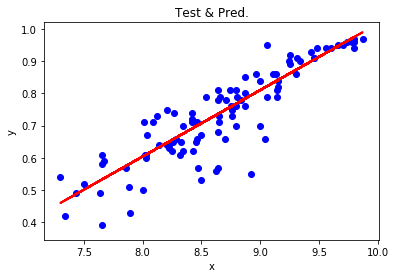

In [15]:
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.title('Test & Pred.')  
plt.xlabel('x')  
plt.ylabel('y') 
plt.show()

### Tasa de error y precisión del modelo

Por último vamos a medir el **error absoluto medio** y la precisión de nuestro modelo con **R2**. Utilizaremos las funciones de métrica de la librería ***sklearn***

In [16]:
print('EAM:', mean_absolute_error(y_test, y_pred))  
print('R2 :', r2_score(y_test, y_pred))

EAM: 0.04693610614269898
R2 : 0.7850947698711452


## 2. Modelo de regresión lineal múltiple

En este apartado vamos a crear un modelo de regresión lineal multiple. Por lo tanto necesitamos obtener las variables del modelo (x1, x2, ..., xn, y) seleccionando las variables del conjunto de datos.

La variables del modelo *x1, x2, ..., xn* serán todas las variables de entrada salvo 'Serial No.' que tiene una correlación muy baja con la variable 'Chance of Admit'.

La variable del modelo *y* será la variable del conjunto de datos que queremos que nuestro modelo realice la predicción, en este caso la variable de salida 'Chance of Admit'.

Ahora ya conocemos las variables (x1, x2, ..., xn, y) que utilizaremos para generar el modelo de regresión lineal multiple.

### Selección de variables para el modelo

Como la variable 'Serial No.' no la vamos a incluir en nuestro modelo, creamos un nuevo DataFrame sin esa variable.

In [17]:
nuevo_dataset = dataset.iloc[:,1:9]
nuevo_dataset

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


En el caso de la regresión lineal múltiple, tendremos varias variables de entrada, en este caso siete y la misma variable de salida.

In [18]:
x = nuevo_dataset.iloc[:,:7]
y = nuevo_dataset["Chance of Admit "]
print("Número de observaciones del dataset:", y.shape[0])

Número de observaciones del dataset: 500


### Entrenamiento y prueba del modelo

Al igual que en el ejemplo de regresión lineal simple, antes de generar el modelo debemos dividir las observaciones del conjunto de datos en dos, una parte para entrenar el algoritmo y otra para probarlo. Al igual que antes utilizaremos el 80% del DataFrame para entrenamiento (train) y el 20% para pruebas (test). Asignamos el mismo valor de random_state que en el ejemplo de regresión lineal simple para obtener las mismas observaciones de test y también de train.

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)
print("Número de observaciones para entrenamiento:", y_train.shape[0])
print("Número de observaciones para prueba       :", y_test.shape[0])

Número de observaciones para entrenamiento: 400
Número de observaciones para prueba       : 100


### Generación del modelo y predicción de datos

Al igual que en el ejemplo de regresión lineal simple, vamos a inicializar nuestro modelo, entrenarlo con las observaciones de train (80%) y obtener las prediciones con nuestro modelo ya entrenado con las observaciones de test (20%).

In [20]:
modeloRLM = LinearRegression()
modeloRLM.fit(x_train, y_train)
y_pred = modeloRLM.predict(x_test)
print("Número de predicciones:", y_pred.shape[0])

Número de predicciones: 100


Para observar las diferencias entre el valor real de *y_test* con *y_pred* podemos generar un DataFrame y visualizamos las diferencias en una de tabla al realizar el display.

In [21]:
dataset_real_pred = pd.DataFrame({'Real': y_test, 'Pred.': y_pred})
dataset_real_pred

,Real,Pred.
331,0.73,0.628585
374,0.39,0.563045
434,0.64,0.626108
354,0.59,0.522782
345,0.49,0.504517
...,...,...
115,0.66,0.798018
102,0.62,0.654737
65,0.55,0.787248
87,0.66,0.658405


### Tasa de error y precisión del modelo

Por último vamos a medir el **error absoluto medio** y la precisión de nuestro modelo con **R2**.

In [22]:
print("EAM:", mean_absolute_error(y_test, y_pred))
print("R2 :", r2_score(y_test, y_pred))

EAM: 0.04040078799417788
R2 : 0.8413731950456498


## 3. Conclusión

Con el modelo de regresión lineal múltiple tenemos menor error absoluto medio (0.0404 vs 0.0469) y mayor porcentaje de precisión (84'13% vs 78'50%) que el modelo de regresión lineal simple. Por lo tanto el modelo de regresión lineal múltiple en este caso es mejor.